### NLPExplainer for sentiment analysis

The class `NLPExplainer` is designed for NLP tasks, acting as a factory of the supported NLP explainers such as integrated-gradient and LIME. `NLPExplainer` provides a unified easy-to-use interface for all the supported explainers. Because the supported NLP explainers in the current version are limited, one can either use `NLPExplainer` or a specific explainer in the package `omnixai.explainers.nlp` to generate explanations.

In [1]:
# This default renderer is used for sphinx docs only. Please delete this cell in IPython.
import plotly.io as pio
pio.renderers.default = "png"

In [2]:
import numpy as np
import transformers
from omnixai.data.text import Text
from omnixai.explainers.nlp import NLPExplainer
from omnixai.visualization.dashboard import Dashboard

In this example, we consider a sentiment analysis task. The test input is an instance of `Text`.

In [3]:
x = Text([
    "What a great movie!",
    "The Interview was neither that funny nor that witty. "
    "Even if there are words like funny and witty, the overall structure is a negative type."
])

The model considered here is a transformer model. Similar to `TabularExplainer`, to initialize `NLPExplainer`, we need to set the following parameters:

  - `explainers`: The names of the explainers to apply, e.g., ["shap", "lime"].
  - `model`: The ML model to explain, e.g., a scikit-learn model, a tensorflow model, a pytorch model or a black-box prediction function.
  - `preprocess`: The preprocessing function converting the raw data (a `Text` instance) into the inputs of model.
  - `postprocess`: The postprocessing function transforming the outputs of model to a user-specific form, e.g., the predicted probability for each class.
  - `mode`: The task type, e.g., "classification", "regression" or "qa".
  
The preprocessing function takes a `Text` instance as its input and outputs the processed features that the ML model consumes. In this example, the `Text` object is converted into a batch of strings.

The postprocessing function converts the outputs into class probabilities.

In [4]:
# The preprocessing function
preprocess = lambda x: x.values
# A transformer model for sentiment analysis
model = transformers.pipeline(
    'sentiment-analysis',
    model='distilbert-base-uncased-finetuned-sst-2-english',
    return_all_scores=True
)
# The postprocessing function
postprocess = lambda outputs: np.array([[s["score"] for s in ss] for ss in outputs])

# Initialize a NLPExplainer
explainer = NLPExplainer(
    explainers=["shap", "lime", "polyjuice"],
    mode="classification",
    model=model,
    preprocess=preprocess,
    postprocess=postprocess
)

There is no "global explanation" for `NLPExplainer` currently. One can simply call explainer.explain to generate local explanations for NLP tasks.

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 3it [00:12, 12.70s/it]               
INFO:polyjuice.polyjuice_wrapper:Setup Polyjuice.
INFO:polyjuice.polyjuice_wrapper:Setup SpaCy processor.
INFO:polyjuice.polyjuice_wrapper:Setup perplexity scorer.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


SHAP results:


LIME results:


Counterfactual results:


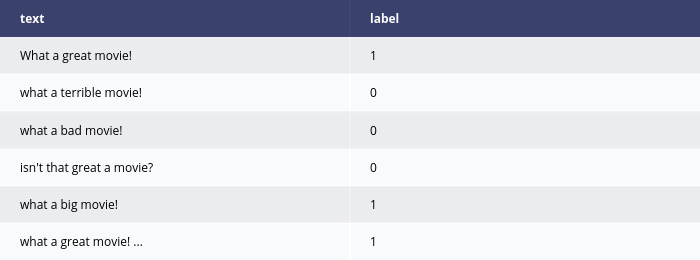

In [5]:
# Generates explanations
local_explanations = explainer.explain(x)

print("SHAP results:")
local_explanations["shap"].ipython_plot()
print("LIME results:")
local_explanations["lime"].ipython_plot()
print("Counterfactual results:")
local_explanations["polyjuice"].ipython_plot()

Given the generated explanations, we can launch a dashboard (a Dash app) for visualization by setting the test instances and the generated local explanations.

In [6]:
# Launch a dashboard for visualization
dashboard = Dashboard(
    instances=x,
    local_explanations=local_explanations
)
dashboard.show()

Dash is running on http://127.0.0.1:8050/



INFO:omnixai.visualization.dashboard:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app "omnixai.visualization.dashboard" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
